<center>Заметка 2. 	Параметрические гипотезы.</center>
<center>курс <q>Прикладной статистический анализ данных</q>.</center>
<center>Версия 1. 18 февраля 2022 г.</center>

(Kanji, критерий 1) 

Линия по производству пудры должна обеспечивать средний вес пудры в упаковке 4 грамма, заявленное стандартное отклонение - 1 грамм. 
		
В ходе инспекции выбрано 9 упаковок, средний вес продукта в них составляет 4.6 грамма.


		
$H_0\colon$ средний вес пудры в упаковке соответствует норме.

In [6]:
mean = 4
std = 1
n = 9
average_weight = 4.6

from scipy.stats import norm
import math
z = (average_weight - mean)/(std/math.sqrt(n))

$H_1\colon$ средний вес пудры в упаковке не соответствует норме

In [7]:
print([norm.ppf(0.025), norm.ppf(0.975)])
print("Z =", z)
print("Значение статистики попало в интервал (принимаем H0)? -", norm.ppf(0.025) < z < norm.ppf(0.975))

h = norm.ppf(0.975)*std/math.sqrt(n)
print("Доверительный интервал:",[average_weight-h, average_weight+h]) # <>4 

print("p_val =", 2*(1-norm.cdf(z)))

[-1.9599639845400545, 1.959963984540054]
Z = 1.799999999999999
Значение статистики попало в интервал (принимаем H0)? - True
Доверительный интервал: [3.9466786718199818, 5.253321328180018]
p_val = 0.07186063822585176


$H_1\colon$ средний вес пудры в упаковке превышает норму

In [8]:
print(norm.ppf(0.95))
print("Z =", z)
print("Значение статистики попало в интервал (принимаем H0)? -", z < norm.ppf(0.95))

h = norm.ppf(0.95)*std/math.sqrt(n)
print("Доверительный предел: ["+str(average_weight-h)+", +∞)") # <>4 

print("p_val =", 1-norm.cdf(z))

1.6448536269514722
Z = 1.799999999999999
Значение статистики попало в интервал (принимаем H0)? - False
Доверительный предел: [4.0517154576828425, +∞)
p_val = 0.03593031911292588


# Метилфенидат и синдром дефицита внимания

In [9]:
import pandas as pd
import numpy as np
import scipy as sp
from collections import defaultdict
from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

np.random.seed(228)

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

В данном исследовании изучалось влияние медикаментозного лечения на когнитивные функции умственно отсталых детей.

В эксперименте принимало участие 24 умственно отсталых ребёнка с СДВГ. В течение недели испытуемые принимали курс метилфенидата в различных дозировках (включая нулевую дозировку, что соответствующую плацебо). В конце недели испытуемые проходили несколько тестов на когнитивные способности, включая "Delay of Gratification" (тест на отложенное удовольствие), исследующий способность контролировать импульсивные поведенческие реакции. Для этого испытуемых сажали перед комптютером и говорили, что на экране будет появляться звезда, если они подождут "достаточно долго" перед нажатием кнопки. Если испытуемые ждали более 4 секунд, то на экране появлялась звезда. В противном случае звезда не появлялась, а счетчик времени сбрасывался. Перед реальным тестом детям позволяли попрактиковаться. 

В данном датасете предлагается сравнить влияние максимальной исследуемой дозы метилфенидата (60 мг/кг) с нулевой дозой (плацебо). Данные дозы соответствуют столбцам D0 и D60 соответственно. В строках датасета содержится количество набранных ребёнком звёзд после недельного курса соответствующей дозы.


In [10]:
adhd = pd.read_csv("ADHD.txt", sep=' ')
adhd.sample(5)

,D0,D60
4,34,38
6,71,77
8,34,45
11,42,57
9,53,42


Чтобы использовать $t$-критерий Стьюдента для связанных выборок, необходимо проверить, нет ли существенных отклонений от нормальности попарных разностей. Для этого воспользуемся визуальной проверкой нормальности при помощи функции `qqplot`. Стоит отметить, что функция `qqplot` позволяет сравнить данную выборку с любым распределением, но по-умолчанию используется нормальное распределение. Воспользуемся также библиотечным тестом проверки нормальности: `scipy.stats.shapiro`

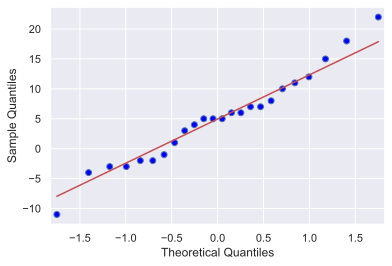

In [11]:
import statsmodels.api as sm
sm.qqplot(adhd['D60'] - adhd['D0'], line ='s')
plt.show()

In [12]:
from scipy.stats import shapiro

print("Shapiro-Wilk test for normality p-value:")
shapiro(adhd.D60 - adhd.D0)[1]

Shapiro-Wilk test for normality p-value:


0.8922544717788696

Применим $t$-критерий Стьюдента `scipy.stats.ttest_rel` для связанных выборок, используемый для проверки нулевой гипотезы, гласящей, что две связанные выборки имеют одинаковое среднее значение.

In [13]:
from scipy.stats import ttest_rel

print("t-test on two related samples of scores, p-value:")
ttest_rel(adhd.D60, adhd.D0).pvalue

t-test on two related samples of scores, p-value:


0.003771488176381471

Полученное p-значение достаточно маленькое, что позволяет нам с уверенностью отвергнуть нулевую гипотезу. Возвращаясь к нашему изначальному исследованию о влиянии лекарства на когнитивные способности, как можно интерпретировать данный результат?

Если бы у нас не было информации о связях между выборками, пришлось бы применять версию критерия Стьюдента для независимых выборок `scipy.stats.ttest_ind`. Данный критерий проверяет нулевую гипотезу о равенстве средних двух независимых выборок при условии, что они были порождены совокупностями с равными дисперсиями.
Сравните результаты применения критерия Стьюдента к этим данным, если считать выборки связанными и не связанными. В каком из этих случаев уровень достигаемой значимости меньше? Как вы думаете почему?

In [14]:
from scipy.stats import ttest_ind

print("p-test for the means of two independent samples of scores, p-value:")
ttest_ind(adhd.D60, adhd.D0).pvalue

p-test for the means of two independent samples of scores, p-value:


0.1532433046938409

в этом случае p-value достаточно большое. Можно ли сделать какие-то выводы о справедливости нулевой гипотезы?


**************
Pearson D.A, Santos C.W., Casat C.D., et al. (2004). **Treatment effects of methylphenidate on cognitive functioning in children with mental retardation and ADHD.** Journal of the American Academy of Child and Adolescent Psychiatry, 43(6), 677–685.   